<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/CCD/blob/master/Projeto_Final%5BMeteorologia%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
import math

# Pré-processamento e análise exploratória

In [0]:
dataBase = pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/DIMAP-BigData/master/Data/nataldiario.csv", 
                       sep = ";", skiprows = 16).drop(columns = "Unnamed: 11")

In [3]:
dataBase.head(10)

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
0,82598,01/08/1983,0,NaN,28.2,NaN,4.1,8.0,NaN,87.75,2.533333
1,82598,01/08/1983,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82598,02/08/1983,0,NaN,28.2,NaN,8.7,4.3,NaN,92.50,4.833333
3,82598,02/08/1983,1200,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82598,03/08/1983,0,NaN,28.5,NaN,9.9,6.9,NaN,89.00,4.000000
5,82598,03/08/1983,1200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,82598,04/08/1983,0,NaN,28.4,NaN,9.4,4.8,NaN,NaN,NaN
7,82598,04/08/1983,1200,0.0,NaN,21.2,NaN,NaN,NaN,NaN,NaN
8,82598,05/08/1983,0,NaN,28.0,NaN,10.0,2.4,NaN,NaN,NaN
9,82598,05/08/1983,1200,0.0,NaN,19.8,NaN,NaN,NaN,NaN,NaN


In [0]:
dataBase.columns = ["Estacao","Data","Hora","Prec","TempMax","TempMin","Insol","EvapPiche","TempCompMed","UmidRelMed","VelVenMed"]

In [0]:
#Transformando "Data" de String em datetime
dataBase["Data"] = pd.to_datetime(dataBase["Data"], format = "%d/%m/%Y")

In [0]:
#Setando "Data" como índice
dataBase.set_index("Data", inplace = True)

In [0]:
#Separando dados de 00:00 h e dados de 12:00 h
dataBase00 = dataBase[dataBase["Hora"] == 0]
dataBase12 = dataBase[dataBase["Hora"] == 1200]

In [8]:
dataBase00.describe()

,Estacao,Hora,Prec,TempMax,TempMin,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed
count,12044.0,12044.0,0.0,11978.000000,0.0,11846.000000,11968.000000,11682.000000,11512.000000,11512.000000
mean,82598.0,0.0,NaN,29.686717,NaN,8.183024,5.754353,26.468079,80.200812,4.205078
std,0.0,0.0,NaN,1.151161,NaN,2.919511,2.253415,1.251795,5.519674,1.214290
min,82598.0,0.0,NaN,23.400000,NaN,0.000000,0.000000,21.760000,61.500000,0.000000
25%,82598.0,0.0,NaN,29.000000,NaN,7.000000,4.200000,25.560000,76.500000,3.466667
50%,82598.0,0.0,NaN,29.800000,NaN,9.300000,5.700000,26.680000,79.500000,4.300000
75%,82598.0,0.0,NaN,30.400000,NaN,10.300000,7.300000,27.420000,83.250000,5.033333
max,82598.0,0.0,NaN,34.000000,NaN,11.700000,21.700000,29.780000,100.000000,9.233333


In [9]:
dataBase12.describe()

,Estacao,Hora,Prec,TempMax,TempMin,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed
count,12044.0,12044.0,12018.000000,0.0,11964.000000,0.0,0.0,0.0,0.0,0.0
mean,82598.0,1200.0,4.622350,NaN,23.121632,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,13.343826,NaN,2.106824,NaN,NaN,NaN,NaN,NaN
min,82598.0,1200.0,0.000000,NaN,12.400000,NaN,NaN,NaN,NaN,NaN
25%,82598.0,1200.0,0.000000,NaN,21.700000,NaN,NaN,NaN,NaN,NaN
50%,82598.0,1200.0,0.000000,NaN,23.300000,NaN,NaN,NaN,NaN,NaN
75%,82598.0,1200.0,2.800000,NaN,24.800000,NaN,NaN,NaN,NaN,NaN
max,82598.0,1200.0,253.200000,NaN,28.300000,NaN,NaN,NaN,NaN,NaN


In [0]:
#Gerando date range de "01/08/1983" até "31/12/2017"
new_index = pd.date_range("1983-08-01", "2017-12-31")

In [0]:
#Gerando dataBase tomando o índice de datas gerado e os dados medidos na base de dados original
dataBase = pd.DataFrame(index = new_index)
dataBase = dataBase.join(dataBase00.drop(columns = ["Prec","TempMin"])).join(dataBase12[["Prec","TempMin"]])

In [0]:
#Eliminando colunas "Hora" e "Estacao" -> Informações irrelavantes para a análise
dataBase = dataBase.drop(columns = ["Hora","Estacao"])

In [13]:
#Fazendo uma verificação numérica da quantidade de falhas na base de dados
base = dataBase.describe()
total = len(dataBase)
print("Total de dias: " + str(total))
print("\nTotal de falhas para cada variável: ")
for i in base.columns:
  print(i + ": " + str(total - base.loc["count", i]))

Total de dias: 12572

Total de falhas para cada variável: 
TempMax: 594.0
Insol: 726.0
EvapPiche: 604.0
TempCompMed: 890.0
UmidRelMed: 1060.0
VelVenMed: 1060.0
Prec: 554.0
TempMin: 608.0


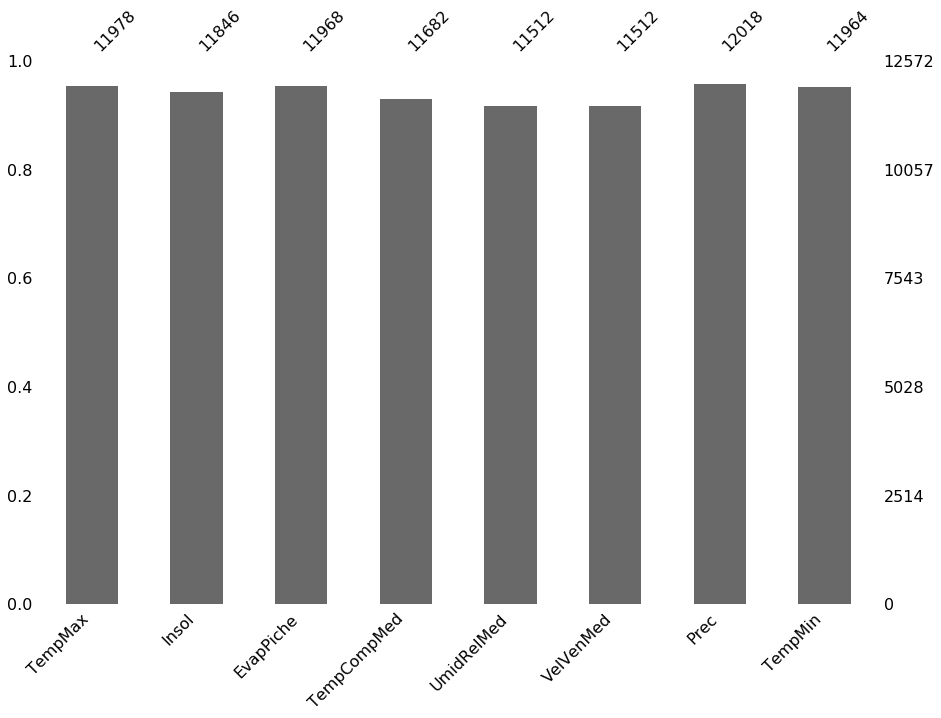

In [14]:
#Exibindo o resultado acima obtido graficamente
msno.bar(dataBase, figsize = (15, 10))

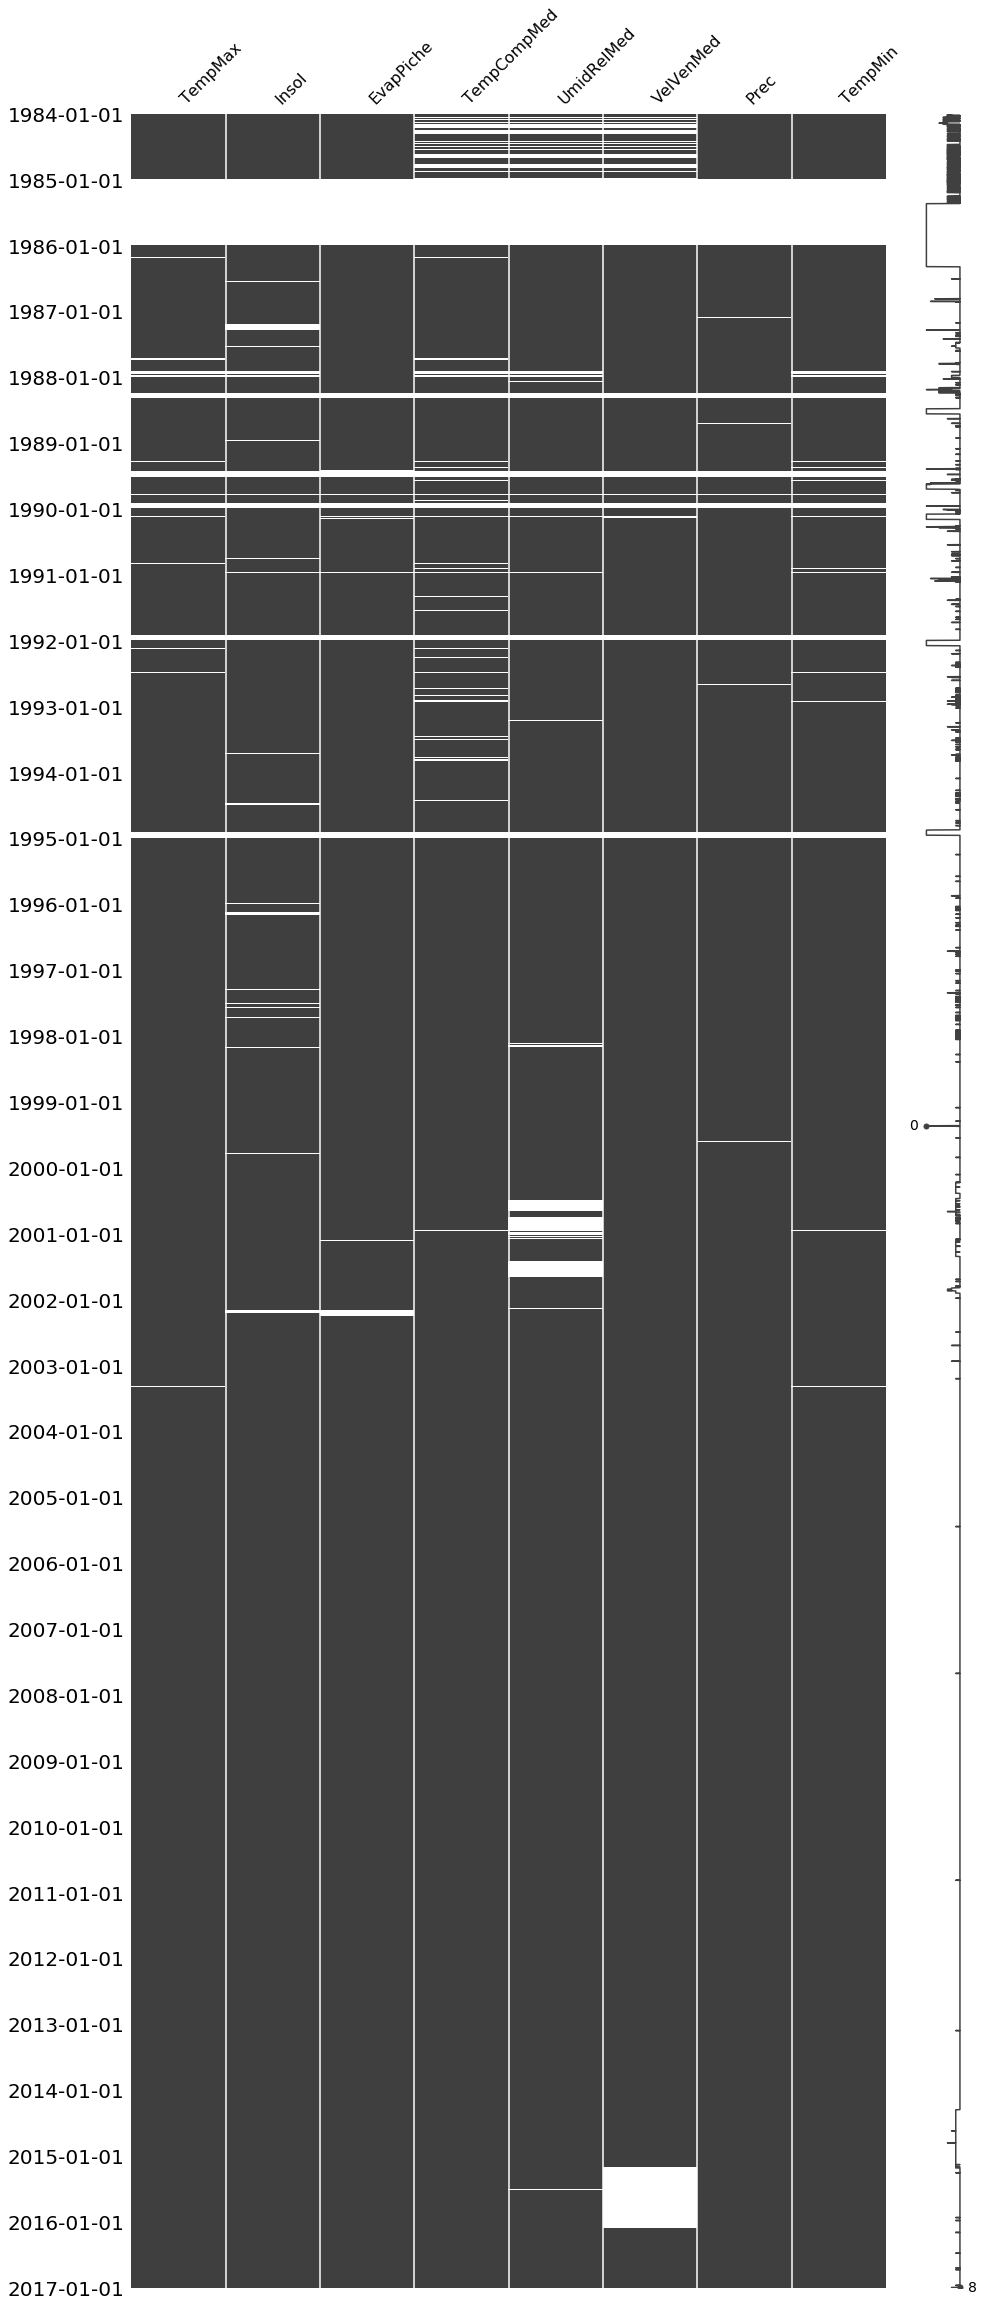

In [15]:
#Visualizando historicamente o acontecimento de falhas na base de dados ao longo do tempo
msno.matrix(dataBase, freq = "AS", figsize = (15, 40))

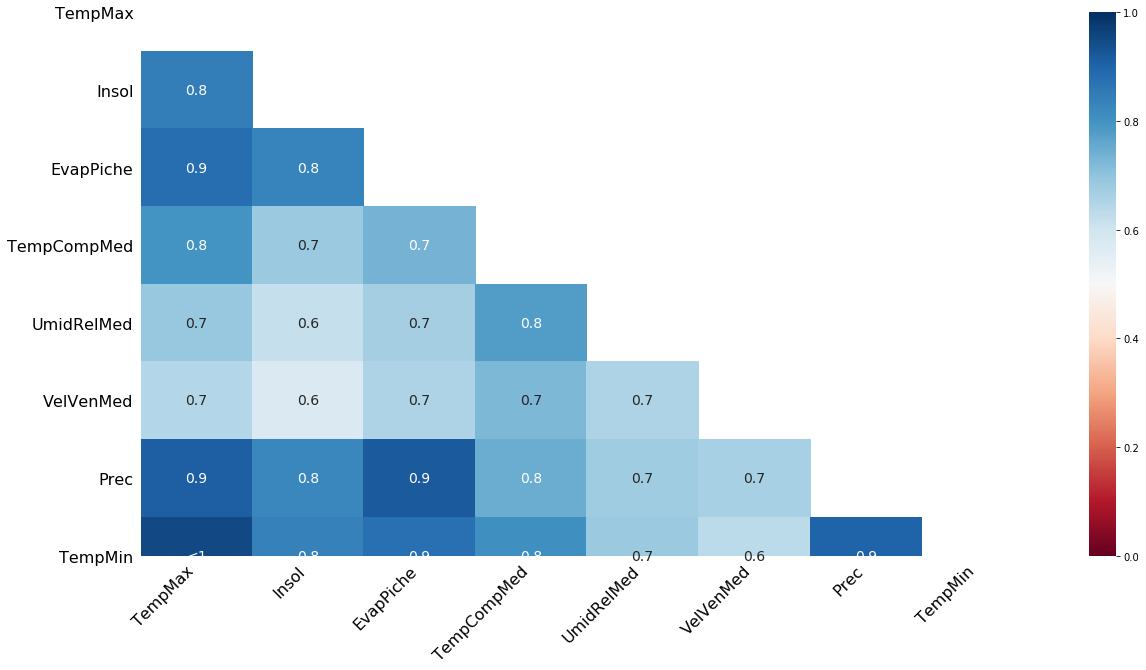

In [16]:
#Verificando o quão fortemente correlacionadas estão as falhas entre cada variável (sem desprezar períodos que a estaçãão estava inoperante)
msno.heatmap(dataBase, figsize = (20, 10), vmin = 0)

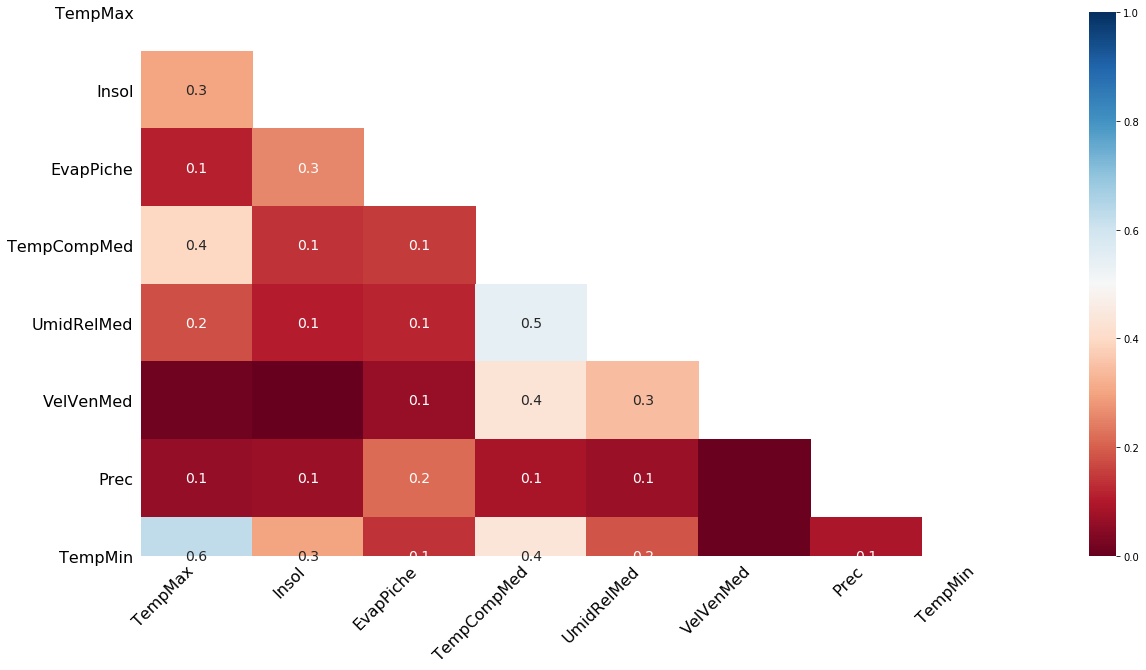

In [17]:
#Verificando o quão fortemente correlacionadas estão as falhas entre cada variável desprezando períodos que a estação estava inoperante
dataBase.dropna(how = "all", inplace = True)
msno.heatmap(dataBase, figsize = (20, 10), vmin = 0)

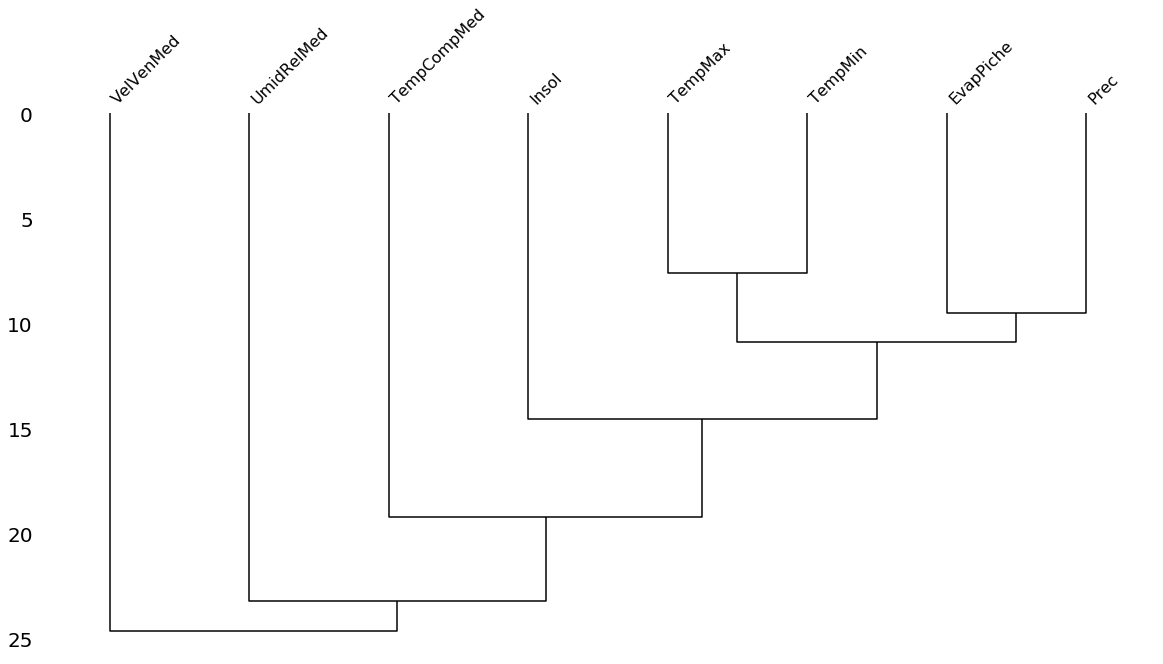

In [18]:
#Dendograma utilizando método da média das distâncias normalizadas, avaliando a proximidade dos clusters
msno.dendrogram(dataBase, figsize = (20,10))

In [0]:
dataBase["TotalDiasAno"] = 0
for i in range(1983, 2018):
  d0 = pd.to_datetime("01/01/" + str(i), format = "%d/%m/%Y")
  dataBase["TotalDias"] = (dataBase.index - d0).days
  #Ano bissexto
  if (i % 400 == 0) or (i % 4 == 0 and i % 100 != 0):
    dataBase.loc[np.array(dataBase.index.year == i), "TotalDiasAno"] = (dataBase.loc[np.array(dataBase.index.year == i), "TotalDias"] / 365) * 360
  else:
    dataBase.loc[np.array(dataBase.index.year == i), "TotalDiasAno"] = (dataBase.loc[np.array(dataBase.index.year == i), "TotalDias"] / 364) * 360
dataBase.drop(columns = "TotalDias", inplace = True)

In [0]:
dataBase["Ano"] = dataBase.index.year

In [21]:
dataBase.head(10)

,TempMax,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed,Prec,TempMin,TotalDiasAno,Ano
1983-08-01,28.2,4.1,8.0,NaN,87.75,2.533333,0.0,NaN,209.670330,1983
1983-08-02,28.2,8.7,4.3,NaN,92.50,4.833333,2.2,NaN,210.659341,1983
1983-08-03,28.5,9.9,6.9,NaN,89.00,4.000000,0.0,NaN,211.648352,1983
1983-08-04,28.4,9.4,4.8,NaN,NaN,NaN,0.0,21.2,212.637363,1983
1983-08-05,28.0,10.0,2.4,NaN,NaN,NaN,0.0,19.8,213.626374,1983
1983-08-06,29.0,8.9,6.6,NaN,NaN,NaN,0.0,23.4,214.615385,1983
1983-08-07,28.8,9.9,10.0,NaN,NaN,NaN,0.4,24.4,215.604396,1983
1983-08-08,28.2,6.1,18.5,NaN,NaN,NaN,0.0,25.0,216.593407,1983
1983-08-09,29.2,10.2,6.1,NaN,NaN,NaN,0.0,20.7,217.582418,1983
1983-08-10,28.2,10.0,8.7,24.28,85.00,4.233333,0.0,18.4,218.571429,1983


In [0]:
dataBase["DiasAno-Seno"], dataBase["DiasAno-Cosseno"] = 0, 0
dataBase["DiasAno-Seno"] = np.sin(np.deg2rad(dataBase["TotalDiasAno"].values))
dataBase["DiasAno-Cosseno"] = np.cos(np.deg2rad(dataBase["TotalDiasAno"].values))

In [0]:
#Eliminando "TotalDiasAno"
dataBase.drop(columns = "TotalDiasAno", inplace = True)

In [24]:
dataBase.head(10)

,TempMax,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed,Prec,TempMin,Ano,DiasAno-Seno,DiasAno-Cosseno
1983-08-01,28.2,4.1,8.0,NaN,87.75,2.533333,0.0,NaN,1983,-0.495009,-0.868888
1983-08-02,28.2,8.7,4.3,NaN,92.50,4.833333,2.2,NaN,1983,-0.509933,-0.860214
1983-08-03,28.5,9.9,6.9,NaN,89.00,4.000000,0.0,NaN,1983,-0.524704,-0.851284
1983-08-04,28.4,9.4,4.8,NaN,NaN,NaN,0.0,21.2,1983,-0.539320,-0.842101
1983-08-05,28.0,10.0,2.4,NaN,NaN,NaN,0.0,19.8,1983,-0.553775,-0.832666
1983-08-06,29.0,8.9,6.6,NaN,NaN,NaN,0.0,23.4,1983,-0.568065,-0.822984
1983-08-07,28.8,9.9,10.0,NaN,NaN,NaN,0.4,24.4,1983,-0.582185,-0.813056
1983-08-08,28.2,6.1,18.5,NaN,NaN,NaN,0.0,25.0,1983,-0.596132,-0.802886
1983-08-09,29.2,10.2,6.1,NaN,NaN,NaN,0.0,20.7,1983,-0.609902,-0.792477
1983-08-10,28.2,10.0,8.7,24.28,85.00,4.233333,0.0,18.4,1983,-0.623490,-0.781831


In [25]:
dataBase.describe()

,TempMax,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed,Prec,TempMin,Ano,DiasAno-Seno,DiasAno-Cosseno
count,11978.000000,11846.000000,11968.000000,11682.000000,11512.000000,11512.000000,12018.000000,11964.000000,12049.000000,12049.000000,1.204900e+04
mean,29.686717,8.183024,5.754353,26.468079,80.200812,4.205078,4.622350,23.121632,2000.882065,-0.009830,5.570943e-04
std,1.151161,2.919511,2.253415,1.251795,5.519674,1.214290,13.343826,2.106824,9.707156,0.709089,7.051087e-01
min,23.400000,0.000000,0.000000,21.760000,61.500000,0.000000,0.000000,12.400000,1983.000000,-1.000000,-1.000000e+00
25%,29.000000,7.000000,4.200000,25.560000,76.500000,3.466667,0.000000,21.700000,1993.000000,-0.725176,-7.009777e-01
50%,29.800000,9.300000,5.700000,26.680000,79.500000,4.300000,0.000000,23.300000,2001.000000,-0.017213,6.123234e-17
75%,30.400000,10.300000,7.300000,27.420000,83.250000,5.033333,2.800000,24.800000,2009.000000,0.700978,7.009777e-01
max,34.000000,11.700000,21.700000,29.780000,100.000000,9.233333,253.200000,28.300000,2017.000000,1.000000,1.000000e+00


In [26]:
dataBase.corr()

,TempMax,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed,Prec,TempMin,Ano,DiasAno-Seno,DiasAno-Cosseno
TempMax,1.000000,0.477772,0.302689,0.880439,-0.422797,0.059236,-0.315516,0.572280,0.146447,0.359579,0.568581
Insol,0.477772,1.000000,0.375141,0.423127,-0.555644,0.340854,-0.409626,0.200116,0.051794,-0.214494,0.231535
EvapPiche,0.302689,0.375141,1.000000,0.298194,-0.415172,0.433623,-0.405906,0.199444,-0.288795,-0.277987,0.456252
TempCompMed,0.880439,0.423127,0.298194,1.000000,-0.481965,-0.003357,-0.299630,0.801852,0.153514,0.362130,0.645398
UmidRelMed,-0.422797,-0.555644,-0.415172,-0.481965,1.000000,-0.299363,0.382808,-0.344213,0.025541,0.204535,-0.336966
VelVenMed,0.059236,0.340854,0.433623,-0.003357,-0.299363,1.000000,-0.254625,-0.080654,-0.218890,-0.367663,0.099414
Prec,-0.315516,-0.409626,-0.405906,-0.299630,0.382808,-0.254625,1.000000,-0.185841,0.004419,0.158516,-0.192526
TempMin,0.572280,0.200116,0.199444,0.801852,-0.344213,-0.080654,-0.185841,1.000000,0.134147,0.191003,0.549478
Ano,0.146447,0.051794,-0.288795,0.153514,0.025541,-0.218890,0.004419,0.134147,1.000000,0.025856,-0.000681
DiasAno-Seno,0.359579,-0.214494,-0.277987,0.362130,0.204535,-0.367663,0.158516,0.191003,0.025856,1.000000,0.003945


In [27]:
#Correlação cruzada 
for i in dataBase.columns:
  for j in dataBase.columns:
      baseAux = dataBase.dropna(subset=[i,j])
      print("Correlação " + i + " - " + j + " : " + str(np.corrcoef(baseAux[i][:-1], baseAux[j][1:])[0][1]))

Correlação TempMax - TempMax : 0.7168850895022628
Correlação TempMax - Insol : 0.19380623466647284
Correlação TempMax - EvapPiche : 0.37838944926227264
Correlação TempMax - TempCompMed : 0.7299769426495892
Correlação TempMax - UmidRelMed : -0.25451402865842504
Correlação TempMax - VelVenMed : -0.03939656251737585
Correlação TempMax - Prec : -0.24674081756562175
Correlação TempMax - TempMin : 0.5493591146043485
Correlação TempMax - Ano : 0.14661045320465482
Correlação TempMax - DiasAno-Seno : 0.3694268714823517
Correlação TempMax - DiasAno-Cosseno : 0.5623189599551469
Correlação Insol - TempMax : 0.26786700389868423
Correlação Insol - Insol : 0.38506745237324685
Correlação Insol - EvapPiche : 0.5480906147352711
Correlação Insol - TempCompMed : 0.2618240147517156
Correlação Insol - UmidRelMed : -0.31133106454691645
Correlação Insol - VelVenMed : 0.21000285683746522
Correlação Insol - Prec : -0.35965585488845025
Correlação Insol - TempMin : 0.1871331436280046
Correlação Insol - Ano : 0.05

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


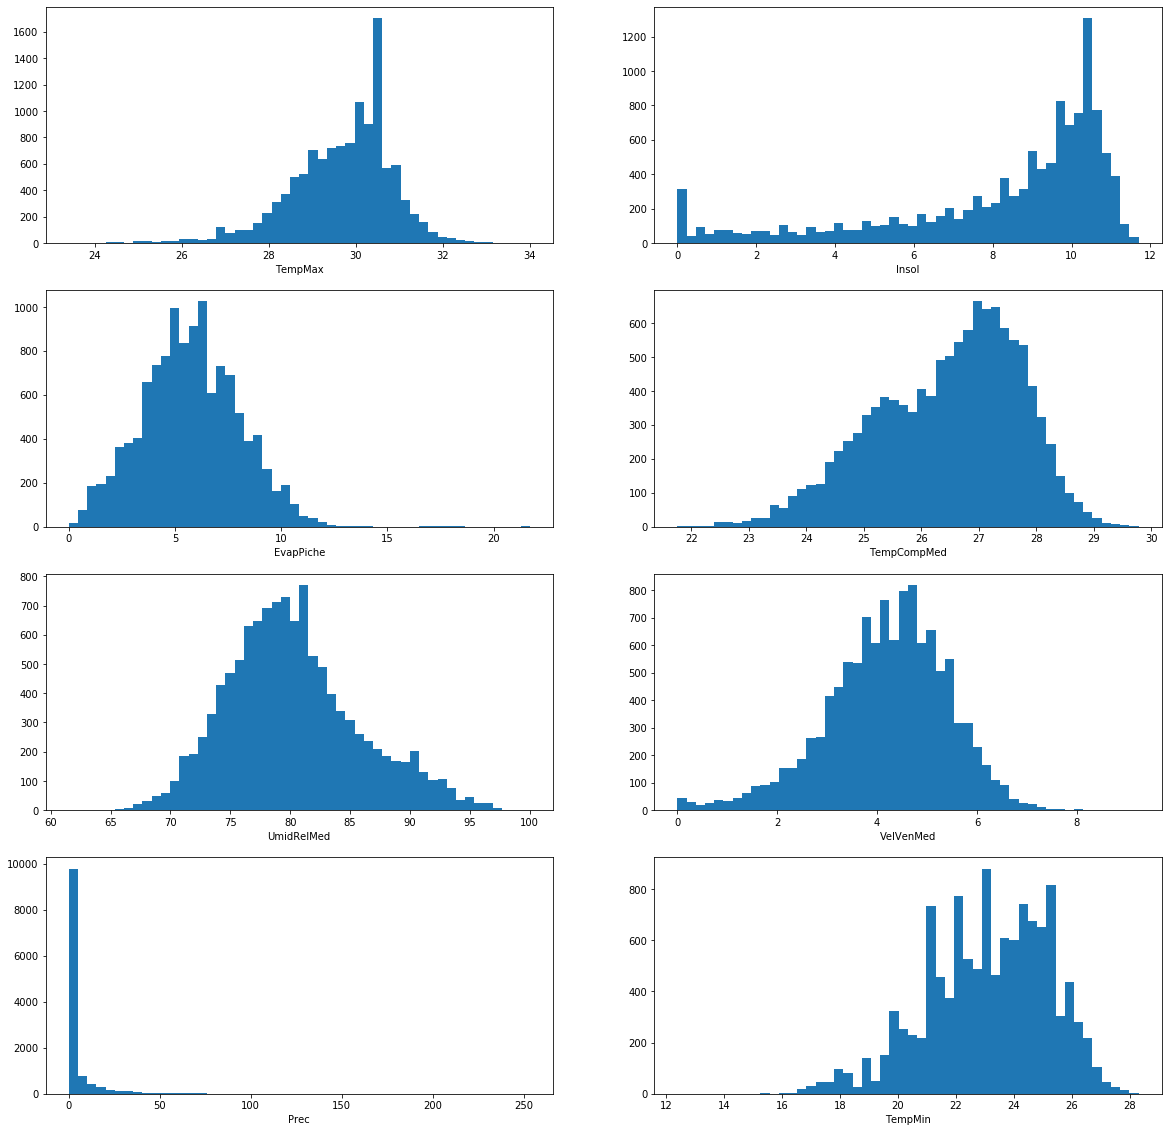

In [28]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))
cont1 = 0
cont2 = 0
for i in dataBase.columns:
  if cont1 != 4:
    ax[cont1, cont2].hist(dataBase[i], bins = 50, label = "OI")
    ax[cont1, cont2].set_xlabel(i)
    if cont2 == 1:
      cont1 = cont1 + 1
      cont2 = 0
    else:
      cont2 = 1

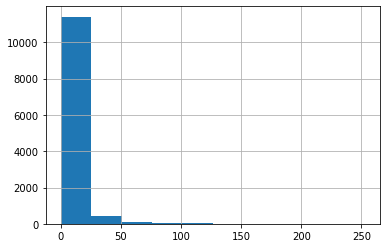

In [29]:
#Distribuição para precipitação
dataBase["Prec"].hist()

In [0]:
#Gerando base de dados auxDataBase para visualizar as normalizações que serão feitas nas variáveis
auxDataBase = dataBase

In [0]:
#Aplicando uma normalização logarítmica para Precipitação
for i in dataBase.index:
  auxDataBase.loc[i, "Prec"] = math.log10(dataBase.loc[i, "Prec"] + 1)

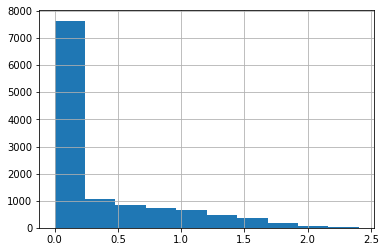

In [32]:
#Nova distribuição para precipitação
auxDataBase["Prec"].hist()

In [0]:
#Normalizações por Score-Z
variaveisNormais = ["TempMax","Insol","EvapPiche","UmidRelMed","VelVenMed","TempMin", "TempCompMed"]
for i in variaveisNormais:
  auxDataBase[i] = (dataBase[i] - dataBase[i].mean()) / dataBase[i].std(ddof = 1)
#Normalizando ano entre 0 e 1
auxDataBase["Ano"] = (dataBase["Ano"] - min(dataBase["Ano"])) / (max(dataBase["Ano"]) - min(dataBase["Ano"]))

In [34]:
auxDataBase.describe()

,TempMax,Insol,EvapPiche,TempCompMed,UmidRelMed,VelVenMed,Prec,TempMin,Ano,DiasAno-Seno,DiasAno-Cosseno
count,1.197800e+04,1.184600e+04,1.196800e+04,1.168200e+04,1.151200e+04,1.151200e+04,12018.000000,1.196400e+04,12049.000000,12049.000000,1.204900e+04
mean,-1.334394e-13,-8.778653e-15,3.635962e-16,-5.067710e-14,6.423998e-16,-1.456332e-14,0.330867,-1.784923e-13,0.525943,-0.009830,5.570943e-04
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.492891,1.000000e+00,0.285505,0.709089,7.051087e-01
min,-5.461198e+00,-2.802874e+00,-2.553614e+00,-3.761064e+00,-3.388028e+00,-3.462993e+00,0.000000,-5.089002e+00,0.000000,-1.000000,-1.000000e+00
25%,-5.965433e-01,-4.052129e-01,-6.897767e-01,-7.254219e-01,-6.704766e-01,-6.081007e-01,0.000000,-6.747747e-01,0.294118,-0.725176,-7.009777e-01
50%,9.840735e-02,3.825901e-01,-2.412040e-02,1.692937e-01,-1.269662e-01,7.817120e-02,0.000000,8.466224e-02,0.529412,-0.017213,6.123234e-17
75%,6.196203e-01,7.251132e-01,6.859130e-01,7.604450e-01,5.524217e-01,6.820905e-01,0.579784,7.966343e-01,0.764706,0.700978,7.009777e-01
max,3.746898e+00,1.204645e+00,7.076213e+00,2.645738e+00,3.587021e+00,4.140902e+00,2.405176,2.457903e+00,1.000000,1.000000,1.000000e+00


# Treinamento do modelo

In [35]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
def normalizacoes(dataBase, variavel):
  auxDataBase = dataBase.copy()
  #Aplicando uma normalização logarítmica para Precipitação, independente se será a variável prevista ou não
  #Gerando, ainda, uma coluna para o dado ligeiramente anterior da série estudada, para permitir que o modelo avalie tendências na série
  auxDataBase[variavel + "Anterior"] = 0
  dadoAnterior = 0
  for i in dataBase.index:
      auxDataBase.loc[i, "Prec"] = math.log10(dataBase.loc[i, "Prec"] + 1)
      auxDataBase.loc[i, variavel + "Anterior"] = dadoAnterior
      dadoAnterior = auxDataBase.loc[i, variavel]
  #Normalizações por Score-Z para todas as variáveis que não serão previstas
  variaveisNormais = ["TempMax","Insol","EvapPiche","UmidRelMed","VelVenMed","TempMin", "TempCompMed"]
  for i in variaveisNormais:
    if i != variavel:
      auxDataBase[i] = (dataBase[i] - dataBase[i].mean()) / dataBase[i].std(ddof = 1)
  #Normalizando ano e precipitaçãão entre 0 e 1
  auxDataBase["Ano"] = (dataBase["Ano"] - min(dataBase["Ano"])) / (max(dataBase["Ano"]) - min(dataBase["Ano"]))
  auxDataBase["Prec"] = (dataBase["Prec"] - min(dataBase["Prec"])) / (max(dataBase["Prec"]) - min(dataBase["Prec"]))
  #Eliminando dados em que não haja a variável prevista e substituindo as falhas nas demais variáveis por 0
  auxDataBase = auxDataBase.dropna(subset=[variavel]).fillna(0)
  return auxDataBase

In [0]:
def MLP(optimizer='adam', init='random_uniform', units = 11, camadas = 2):    
  #Criando o modelo
  mlp = Sequential()
  #Adicionando a camada de entrada
  mlp.add(Dense(activation = 'tanh', input_dim = units, units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando as camadas escondidas
  for i in range(camadas):
    mlp.add(Dense(activation = 'tanh', units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando a camada de saída
  mlp.add(Dense(units = 1, kernel_initializer = init, bias_initializer='zeros'))    
  # Compilando o modelo
  mlp.compile(loss='mean_squared_error', optimizer = optimizer, metrics= ['mae'])
  return mlp

In [0]:
def treinarPreenchimento(dataBase, variavel):
  baseAux = normalizacoes(dataBase, variavel)
  #Separando conjunto de treino e teste
  X_train, X_test, Y_train, Y_test = train_test_split(baseAux.drop(columns = variavel), baseAux[variavel], test_size = 0.2, random_state = 9)
  X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size = 0.2, random_state = 9)
  print(X_train.shape)
  mlp = MLP()
  melhorMAE, melhorMSE, melhorCorrCoef = 1000, 1000, 0
  continuarCondition = True
  #Treinando enquanto continuem melhorando os resultados entre o treinamento e validação
  while continuarCondition:
    hist = mlp.fit(X_train, Y_train, epochs = 10, verbose = 1)
    y_predicted = mlp.predict(X_valid)
    maeAtual = mean_absolute_error(y_predicted, Y_valid)
    mseAtual = mean_squared_error(y_predicted, Y_valid)
    corrCoefAtual = np.corrcoef(y_predicted[:,0], Y_valid.values)[0][1]
    if  maeAtual < melhorMAE:
      melhorMAE = mean_absolute_error(y_predicted, Y_valid)
      continue
    if mseAtual < melhorMSE:
      melhorMSE = mseAtual
      continue
    if corrCoefAtual > melhorCorrCoef:
      melhorCorrCoef = corrCoefAtual
      continue
    continuarCondition = False
    y_predicted = mlp.predict(X_test)[:,0]
  #Transformando a escala de precipitação, quando for necessário avaliar seus resultados numericamente
  if variavel == "Prec":
    for i in range(len(y_predicted)):
      y_predicted[i] = pow(10, y_predicted[i]) - 1
      Y_test[i] = pow(10, Y_test[i]) - 1
  print("MAE para " + variavel + " = " + str(mean_absolute_error(y_predicted, Y_test)))
  print("MSE para " + variavel + " = " + str(mean_squared_error(y_predicted, Y_test)))
  print("Coeficiente de Pearson para " + variavel + " = " + str(np.corrcoef(y_predicted, Y_test.values)[0][1]))
  return mlp

In [39]:
mlpTempMax = treinarPreenchimento(dataBase, "TempMax")

(9582, 11)







Epoch 1/10





9582/9582 [==============================] - 1s 68us/step - loss: 0.4300 - mean_absolute_error: 0.4561
Epoch 2/10
9582/9582 [==============================] - 0s 41us/step - loss: 0.2136 - mean_absolute_error: 0.3235
Epoch 3/10
9582/9582 [==============================] - 0s 41us/step - loss: 0.1998 - mean_absolute_error: 0.3136
Epoch 4/10
9582/9582 [==============================] - 0s 41us/step - loss: 0.1957 - mean_absolute_error: 0.3111
Epoch 5/10
9582/9582 [==============================] - 0s 38us/step - loss: 0.1929 - mean_absolute_error: 0.3094
Epoch 6/10
9582/9582 [==============================] - 0s 40us/step - loss: 0.1915 - mean_absolute_error: 0.3088
Epoch 7/10
9582/9582 [==============================] - 0s 38us/step - loss: 0.1902 - mean_absolute_error: 0.3080
Epoch 8/10
9582/9582 [==============================] - 0s 37us/step - loss: 0.1881 - mean_absolute_error: 0.3068
Epoch 9/10
9582/9582 [==============================] - 0s 39us/s

In [40]:
mlpInsol = treinarPreenchimento(dataBase, "Insol")

(9476, 11)
Epoch 1/10
9476/9476 [==============================] - 1s 65us/step - loss: 0.6546 - mean_absolute_error: 0.6095
Epoch 2/10
9476/9476 [==============================] - 0s 37us/step - loss: 0.4930 - mean_absolute_error: 0.5350
Epoch 3/10
9476/9476 [==============================] - 0s 39us/step - loss: 0.4806 - mean_absolute_error: 0.5277
Epoch 4/10
9476/9476 [==============================] - 0s 39us/step - loss: 0.4746 - mean_absolute_error: 0.5230
Epoch 5/10
9476/9476 [==============================] - 0s 38us/step - loss: 0.4698 - mean_absolute_error: 0.5185
Epoch 6/10
9476/9476 [==============================] - 0s 39us/step - loss: 0.4635 - mean_absolute_error: 0.5134
Epoch 7/10
9476/9476 [==============================] - 0s 39us/step - loss: 0.4578 - mean_absolute_error: 0.5079
Epoch 8/10
9476/9476 [==============================] - 0s 39us/step - loss: 0.4503 - mean_absolute_error: 0.5010
Epoch 9/10
9476/9476 [==============================] - 0s 37us/step - loss: 

In [41]:
mlpEvapPiche = treinarPreenchimento(dataBase, "EvapPiche")

(9574, 11)
Epoch 1/10
9574/9574 [==============================] - 1s 70us/step - loss: 0.5105 - mean_absolute_error: 0.5375
Epoch 2/10
9574/9574 [==============================] - 0s 38us/step - loss: 0.3096 - mean_absolute_error: 0.4127
Epoch 3/10
9574/9574 [==============================] - 0s 39us/step - loss: 0.3030 - mean_absolute_error: 0.4098
Epoch 4/10
9574/9574 [==============================] - 0s 39us/step - loss: 0.3013 - mean_absolute_error: 0.4081
Epoch 5/10
9574/9574 [==============================] - 0s 39us/step - loss: 0.3006 - mean_absolute_error: 0.4069
Epoch 6/10
9574/9574 [==============================] - 0s 38us/step - loss: 0.3004 - mean_absolute_error: 0.4076
Epoch 7/10
9574/9574 [==============================] - 0s 39us/step - loss: 0.2989 - mean_absolute_error: 0.4066
Epoch 8/10
9574/9574 [==============================] - 0s 39us/step - loss: 0.2989 - mean_absolute_error: 0.4060
Epoch 9/10
9574/9574 [==============================] - 0s 39us/step - loss: 

In [42]:
mlpTempCompMed = treinarPreenchimento(dataBase, "TempCompMed")

(9345, 11)
Epoch 1/10
9345/9345 [==============================] - 1s 80us/step - loss: 0.2992 - mean_absolute_error: 0.3847
Epoch 2/10
9345/9345 [==============================] - 0s 38us/step - loss: 0.0826 - mean_absolute_error: 0.2185
Epoch 3/10
9345/9345 [==============================] - 0s 40us/step - loss: 0.0750 - mean_absolute_error: 0.2086
Epoch 4/10
9345/9345 [==============================] - 0s 42us/step - loss: 0.0718 - mean_absolute_error: 0.2048
Epoch 5/10
9345/9345 [==============================] - 0s 39us/step - loss: 0.0708 - mean_absolute_error: 0.2036
Epoch 6/10
9345/9345 [==============================] - 0s 39us/step - loss: 0.0703 - mean_absolute_error: 0.2033
Epoch 7/10
9345/9345 [==============================] - 0s 39us/step - loss: 0.0692 - mean_absolute_error: 0.2009
Epoch 8/10
9345/9345 [==============================] - 0s 39us/step - loss: 0.0692 - mean_absolute_error: 0.2010
Epoch 9/10
9345/9345 [==============================] - 0s 39us/step - loss: 

In [43]:
mlpUmidRelMed = treinarPreenchimento(dataBase, "UmidRelMed")

(9209, 11)
Epoch 1/10
9209/9209 [==============================] - 1s 88us/step - loss: 0.5868 - mean_absolute_error: 0.5951
Epoch 2/10
9209/9209 [==============================] - 0s 40us/step - loss: 0.4066 - mean_absolute_error: 0.5002
Epoch 3/10
9209/9209 [==============================] - 0s 40us/step - loss: 0.3918 - mean_absolute_error: 0.4908
Epoch 4/10
9209/9209 [==============================] - 0s 41us/step - loss: 0.3873 - mean_absolute_error: 0.4873
Epoch 5/10
9209/9209 [==============================] - 0s 39us/step - loss: 0.3867 - mean_absolute_error: 0.4862
Epoch 6/10
9209/9209 [==============================] - 0s 40us/step - loss: 0.3850 - mean_absolute_error: 0.4869
Epoch 7/10
9209/9209 [==============================] - 0s 40us/step - loss: 0.3842 - mean_absolute_error: 0.4850
Epoch 8/10
9209/9209 [==============================] - 0s 43us/step - loss: 0.3827 - mean_absolute_error: 0.4845
Epoch 9/10
9209/9209 [==============================] - 0s 41us/step - loss: 

In [44]:
mlpVelVenMed = treinarPreenchimento(dataBase, "VelVenMed")

(9209, 11)
Epoch 1/10
9209/9209 [==============================] - 1s 101us/step - loss: 0.6637 - mean_absolute_error: 0.6320
Epoch 2/10
9209/9209 [==============================] - 0s 42us/step - loss: 0.5415 - mean_absolute_error: 0.5773
Epoch 3/10
9209/9209 [==============================] - 0s 43us/step - loss: 0.5339 - mean_absolute_error: 0.5752
Epoch 4/10
9209/9209 [==============================] - 0s 44us/step - loss: 0.5314 - mean_absolute_error: 0.5744
Epoch 5/10
9209/9209 [==============================] - 0s 44us/step - loss: 0.5295 - mean_absolute_error: 0.5738
Epoch 6/10
9209/9209 [==============================] - 0s 46us/step - loss: 0.5288 - mean_absolute_error: 0.5739
Epoch 7/10
9209/9209 [==============================] - 0s 43us/step - loss: 0.5277 - mean_absolute_error: 0.5732
Epoch 8/10
9209/9209 [==============================] - 0s 44us/step - loss: 0.5266 - mean_absolute_error: 0.5734
Epoch 9/10
9209/9209 [==============================] - 0s 45us/step - loss:

In [45]:
mlpPrec = treinarPreenchimento(dataBase, "Prec")

(9614, 11)
Epoch 1/10
9614/9614 [==============================] - 1s 104us/step - loss: 0.0274 - mean_absolute_error: 0.1189
Epoch 2/10
9614/9614 [==============================] - 0s 41us/step - loss: 0.0220 - mean_absolute_error: 0.1117
Epoch 3/10
9614/9614 [==============================] - 0s 41us/step - loss: 0.0218 - mean_absolute_error: 0.1112
Epoch 4/10
9614/9614 [==============================] - 0s 42us/step - loss: 0.0216 - mean_absolute_error: 0.1104
Epoch 5/10
9614/9614 [==============================] - 0s 44us/step - loss: 0.0215 - mean_absolute_error: 0.1098
Epoch 6/10
9614/9614 [==============================] - 0s 42us/step - loss: 0.0212 - mean_absolute_error: 0.1083
Epoch 7/10
9614/9614 [==============================] - 0s 41us/step - loss: 0.0208 - mean_absolute_error: 0.1062
Epoch 8/10
9614/9614 [==============================] - 0s 41us/step - loss: 0.0204 - mean_absolute_error: 0.1035
Epoch 9/10
9614/9614 [==============================] - 0s 42us/step - loss:

In [46]:
mlpPrec = treinarPreenchimento(dataBase, "TempMin")

(9571, 11)
Epoch 1/10
9571/9571 [==============================] - 1s 112us/step - loss: 0.4373 - mean_absolute_error: 0.5002
Epoch 2/10
9571/9571 [==============================] - 0s 43us/step - loss: 0.2032 - mean_absolute_error: 0.3416
Epoch 3/10
9571/9571 [==============================] - 0s 41us/step - loss: 0.1958 - mean_absolute_error: 0.3372
Epoch 4/10
9571/9571 [==============================] - 0s 41us/step - loss: 0.1925 - mean_absolute_error: 0.3339
Epoch 5/10
9571/9571 [==============================] - 0s 42us/step - loss: 0.1909 - mean_absolute_error: 0.3324
Epoch 6/10
9571/9571 [==============================] - 0s 41us/step - loss: 0.1882 - mean_absolute_error: 0.3300
Epoch 7/10
9571/9571 [==============================] - 0s 42us/step - loss: 0.1872 - mean_absolute_error: 0.3296
Epoch 8/10
9571/9571 [==============================] - 0s 41us/step - loss: 0.1853 - mean_absolute_error: 0.3266
Epoch 9/10
9571/9571 [==============================] - 0s 41us/step - loss: